In [1]:
!pip install -q pyomo


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 55.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.6 MB/s eta 0:00:00


In [2]:
pip install pyomo.contrib.pynumero


ERROR: Could not find a version that satisfies the requirement pyomo.contrib.pynumero (from versions: none)
ERROR: No matching distribution found for pyomo.contrib.pynumero


In [3]:
!pip install gurobipy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 44.4 MB/s eta 0:00:00


In [4]:
!apt-get install -y -qq coinor-cbc

Selecting previously unselected package coinor-libcoinutils3v5:amd64.
(Reading database ... 121920 files and directories currently installed.)
Preparing to unpack .../0-coinor-libcoinutils3v5_2.11.4+repack1-2_amd64.deb ...
Unpacking coinor-libcoinutils3v5:amd64 (2.11.4+repack1-2) ...
Selecting previously unselected package coinor-libosi1v5:amd64.
Preparing to unpack .../1-coinor-libosi1v5_0.108.6+repack1-2_amd64.deb ...
Unpacking coinor-libosi1v5:amd64 (0.108.6+repack1-2) ...
Selecting previously unselected package coinor-libclp1.
Preparing to unpack .../2-coinor-libclp1_1.17.5+repack1-1_amd64.deb ...
Unpacking coinor-libclp1 (1.17.5+repack1-1) ...
Selecting previously unselected package coinor-libcgl1:amd64.
Preparing to unpack .../3-coinor-libcgl1_0.60.3+repack1-3_amd64.deb ...
Unpacking coinor-libcgl1:amd64 (0.60.3+repack1-3) ...
Selecting previously unselected package coinor-libcbc3:amd64.
Preparing to unpack .../4-coinor-libcbc3_2.10.7+ds1-1_amd64.deb ...
Unpacking coinor-libcbc3:

In [5]:
import pandas as pd

crop_data = pd.read_csv('/content/crops_type_conditions.csv')

# Ask user for input of temperature and pH
temp = float(input("Enter temperature: "))
ph = float(input("Enter pH: "))

# Filter crops based on temperature and pH
filtered_crops = crop_data[
    (crop_data['min_temp'] <= temp) & (crop_data['max_temp'] >= temp) &
    (crop_data['min_ph'] <= ph) & (crop_data['max_ph'] >= ph)
]

# Display filtered crops
if len(filtered_crops) > 0:
    print("Crops suitable for the given temperature and pH:")
    print(filtered_crops['crops'])
else:
    print("No crops found for the given temperature and pH.")

# Store the filtered crops for later use
filtered_crops.to_csv('/content/filtered_crops.csv', index=False)

Enter temperature: 30
Enter pH: 7
Crops suitable for the given temperature and pH:
0                  rice चावल
1                wheat गेहूँ
3                maize मक्का
4          soyabean सोया बीन
5            sugarcane गन्ना
6                   oat ओएटी
7               sorghum चारा
8         pearl millet बाजरा
9               berseem चारा
10          watermelon तरबूज
11               melon तरबूज
12       sweet potato शकरकंद
13             cucumber खीरा
14         pepper काली मिर्च
15    sweet corn स्वीट कॉर्न
17              tomato टमाटर
18               onion प्याज
19              garlic लहसुन
22              lettuce सलाद
Name: crops, dtype: object


In [6]:
import pandas as pd
import random

# Load the CSV file
# Assuming the CSV file is named 'crop_data.csv' and located in the current directory
file_path = '/content/filtered_crops.csv'
df = pd.read_csv(file_path)

# Add random values for req_n, req_p, and req_k columns
df['req_n'] = [random.randint(40, 60) for _ in range(len(df))]
df['req_p'] = [random.randint(25, 40) for _ in range(len(df))]
df['req_k'] = [random.randint(15, 30) for _ in range(len(df))]
df['req_water'] = [random.randint(40, 55) for _ in range(len(df))]
df['yield_1'] = [random.uniform(0.8, 1) for _ in range(len(df))]
df['yield_2'] = [random.uniform(0.8, 1) for _ in range(len(df))]
df['yield_3'] = [random.uniform(0.8, 1) for _ in range(len(df))]
df['labour_cost_1'] = [random.randint(200, 500) for _ in range(len(df))]
df['labour_cost_2'] = [random.randint(200, 500) for _ in range(len(df))]
df['labour_cost_3'] = [random.randint(200, 500) for _ in range(len(df))]
df['cost_1'] = [random.randint(10, 40) for _ in range(len(df))]
df['cost_2'] = [random.randint(20, 45) for _ in range(len(df))]
df['cost_3'] = [random.randint(10, 40) for _ in range(len(df))]


# Save the modified DataFrame back to CSV
output_file_path = 'npk_water_crop_data.csv'
df.to_csv(output_file_path, index=False)


In [7]:
import pandas as pd

crop_data = pd.read_csv("/content/npk_water_crop_data.csv")

n_data = pd.read_csv("/content/farm_heatmap_N (1).csv")
p_data = pd.read_csv("/content/farm_heatmap_P (1).csv")
k_data = pd.read_csv("/content/farm_heatmap_K (1).csv")
water_data = pd.read_csv("/content/farm_heatmap_water_final.csv")

for index, row in crop_data.iterrows():
    crop_name = row['crops']
    req_n = row['req_n']
    req_p = row['req_p']
    req_k = row['req_k']
    req_water = row['req_water']

    n_diff = -1*(n_data - req_n)

    p_diff = -1*(p_data - req_p)

    k_diff = -1*(k_data - req_k)

    water_diff = (req_water - water_data)

    n_diff.to_csv(f"{crop_name}_n_diff.csv", index=False)
    p_diff.to_csv(f"{crop_name}_p_diff.csv", index=False)
    k_diff.to_csv(f"{crop_name}_k_diff.csv", index=False)
    water_diff.to_csv(f"{crop_name}_water_diff.csv", index=False)

In [8]:
import os
import pandas as pd
from pyomo.environ import *
import glob

def solve_model(csv_path):
    # Reading the CSV file
    data = pd.read_csv(csv_path, header=None)

    # Define the model
    model = ConcreteModel()

    # Sets
    model.rows = RangeSet(0, 9)
    model.cols = RangeSet(0, 9)

    # Parameters
    model.water_requirement = Param(model.rows, model.cols, initialize=lambda model, i, j: data.iloc[i, j])

    # Decision variables
    model.water = Var(model.rows, model.cols, within=Binary)

    # Objective function (reformulate to be linear if possible)
    def obj_rule(model):
        total = sum(model.water[i, j] for i in model.rows for j in model.cols)
        return total

    model.obj = Objective(rule=obj_rule, sense=maximize)

    # Constraint function for available water
    def constraint_rule(model):
        return sum(model.water[i, j] * model.water_requirement[i, j] for i in model.rows for j in model.cols) <= 600

    model.constraint = Constraint(rule=constraint_rule)

    # Solve the model
    solver = SolverFactory('cbc')
    results = solver.solve(model)

    # Extract crop name from CSV filename
    crop_name = os.path.splitext(os.path.basename(csv_path))[0].split('_')[0]

    # Check if the solver successfully found a solution
    if results.solver.termination_condition == TerminationCondition.optimal:
        # Display results
        print("Crop:", crop_name)
        print("Objective value:", model.obj())
        print("Watering plan:")
        for i in model.rows:
            for j in model.cols:
                print(int(model.water[i, j].value), end=" ")
            print()

        # Extracting the water decision variable values
        water_values = [[int(model.water[i, j].value) for j in model.cols] for i in model.rows]

        # Counting the number of 1s
        num_ones = sum(sum(row) for row in water_values)

        # Displaying the number of 1s
        print("Number of fields to water:", num_ones)

        # Write results to file
        output_filename = f"{crop_name}_result.csv"
        with open(output_filename, 'w') as f:
            f.write("Crop: " + crop_name + "\n")
            f.write("Objective value: " + str(model.obj()) + "\n")
            f.write("Watering plan:\n")
            for row in water_values:
                f.write(' '.join(map(str, row)) + '\n')
            f.write("Number of fields to water: " + str(num_ones))

        return crop_name, model.obj()
    else:
        print("Solver failed to find an optimal solution for", csv_path)
        return crop_name, None

# Get all CSV files matching the pattern {crop_name}_water_diff.csv
csv_files = glob.glob("*_water_diff.csv")

# List to store objective values for each crop
objective_values = []

# Solve model for each CSV file
for csv_file in csv_files:
    crop_name, obj_value = solve_model(csv_file)
    if obj_value is not None:
        objective_values.append((crop_name, obj_value))

# Read filtered crops data
filtered_crops = pd.read_csv('/content/filtered_crops.csv')

# Update the objective value column
for crop_name, obj_value in objective_values:
    filtered_crops.loc[filtered_crops['crops'] == crop_name, 'objective_value'] = obj_value

# Save updated filtered crops data
filtered_crops.to_csv('/content/filtered_crops.csv', index=False)

# Display filtered crops with added objective values
print("Filtered Crops with Objective Values:")
print(filtered_crops)

Crop: pepper काली मिर्च
Objective value: 32.0
Watering plan:
1 1 1 1 1 1 1 1 1 1 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 1 
0 0 0 0 0 0 0 0 0 1 
0 0 0 0 0 0 0 0 0 1 
0 0 0 0 0 0 1 1 1 1 
0 0 1 1 1 1 0 0 0 1 
0 0 0 0 0 0 0 0 0 1 
0 0 0 0 0 0 0 0 0 0 
0 1 1 1 1 1 1 1 1 1 
Number of fields to water: 32
Crop: rice चावल
Objective value: 28.0
Watering plan:
1 1 1 1 1 1 1 1 1 1 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 1 
0 0 0 0 0 0 0 0 0 1 
0 0 0 0 0 0 0 0 0 1 
0 0 0 0 0 0 0 1 1 1 
0 0 0 0 0 0 0 0 0 1 
0 0 0 0 0 0 0 0 0 1 
0 0 0 0 0 0 0 0 0 1 
0 1 1 1 1 1 1 1 1 1 
Number of fields to water: 28
Crop: pearl millet बाजरा
Objective value: 48.0
Watering plan:
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 1 
0 0 0 0 0 0 0 0 1 1 
0 0 1 0 1 1 1 1 1 1 
0 0 1 1 1 1 1 1 1 1 
0 0 1 1 1 1 1 1 1 1 
0 0 1 1 1 1 1 1 1 1 
0 0 1 1 1 1 0 0 0 1 
0 1 1 1 1 1 1 1 1 1 
Number of fields to water: 48
Crop: onion प्याज
Objective value: 32.0
Watering plan:
1 1 1 1 1 1 1 1 1 1 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0

In [9]:
import pandas as pd
import numpy as np

def calculate_fertilizer_requirements(crop_name):
    df_desired_N = pd.read_csv(f'{crop_name}_n_diff.csv')
    df_desired_P = pd.read_csv(f'{crop_name}_p_diff.csv')
    df_desired_K = pd.read_csv(f'{crop_name}_k_diff.csv')

    final_N_array = np.zeros((10, 10))
    final_P_array = np.zeros((10, 10))
    final_K_array = np.zeros((10, 10))
    cost_per_unit_array = np.zeros((10, 10))

    for i in range(9):
        for j in range(10):
            desired_N = df_desired_N.iloc[i, j]
            desired_P = df_desired_P.iloc[i, j]
            desired_K = df_desired_K.iloc[i, j]

            if desired_K != 0:
                normalized_N = desired_N / desired_K
                normalized_P = desired_P / desired_K
                normalized_K = desired_K / desired_K

            df_ratio_fertilizers = pd.read_csv('/content/ratio_fertilizers.csv')

            closest_x = None
            best_N = None
            best_P = None
            best_cost_per_unit = None

            for index, row in df_ratio_fertilizers.iterrows():
                N = row['Nitro_N']
                P = row['Phos_P']
                cost_per_unit = row['cost']

                temp_x = (normalized_N / N) / (normalized_P / P)

                diff_from_1 = np.abs(temp_x - 1)

                if closest_x is None or diff_from_1 < np.abs(closest_x - 1):
                    closest_x = temp_x
                    best_N = N
                    best_P = P
                    best_cost_per_unit = cost_per_unit

            amount_of_fertilizer_needed = desired_N / best_N

            final_N = (desired_N / best_N) * best_N
            final_P = (desired_N / best_N) * best_P
            final_K = (desired_N / best_N) * normalized_K

            final_N_array[i, j] = final_N
            final_P_array[i, j] = final_P
            final_K_array[i, j] = final_K
            cost_per_unit_array[i, j] = best_cost_per_unit

    pd.DataFrame(final_N_array).to_csv(f'final_N_{crop_name}.csv', index=False, header=False)
    pd.DataFrame(final_P_array).to_csv(f'final_P_{crop_name}.csv', index=False, header=False)
    pd.DataFrame(final_K_array).to_csv(f'final_K_{crop_name}.csv', index=False, header=False)
    pd.DataFrame(cost_per_unit_array).to_csv(f'cost_per_unit_{crop_name}.csv', index=False, header=False)


    return cost_per_unit_array.sum()


crop_names_df = pd.read_csv("/content/filtered_crops.csv")
crop_names = crop_names_df['crops'].tolist()


total_cost_per_crop = {}


for crop in crop_names:
    total_cost = calculate_fertilizer_requirements(crop)
    total_cost_per_crop[crop] = total_cost

    import pandas as pd


total_cost_df = pd.DataFrame.from_dict(total_cost_per_crop, orient='index', columns=['total_cost'])
total_cost_df.index.name = 'crops'  # Set the name of the index column
total_cost_df.to_csv('total_cost_per_crop.csv', index=True, header=True)

In [10]:
import pandas as pd
import numpy as np

def calculate_fertilizer_requirements(crop_name):
    df_desired_N = pd.read_csv(f'{crop_name}_n_diff.csv')
    df_desired_P = pd.read_csv(f'{crop_name}_p_diff.csv')
    df_desired_K = pd.read_csv(f'{crop_name}_k_diff.csv')

    final_N_array = np.zeros((10, 10))
    final_P_array = np.zeros((10, 10))
    final_K_array = np.zeros((10, 10))
    cost_per_unit_array = np.zeros((10, 10))
    amount_of_fertilizer_needed_array = np.zeros((10, 10))  # Array to store the amount of fertilizer needed

    for i in range(9):
        for j in range(10):
            desired_N = df_desired_N.iloc[i, j]
            desired_P = df_desired_P.iloc[i, j]
            desired_K = df_desired_K.iloc[i, j]

            if desired_K != 0:
                normalized_N = desired_N / desired_K
                normalized_P = desired_P / desired_K
                normalized_K = desired_K / desired_K

            df_ratio_fertilizers = pd.read_csv('/content/ratio_fertilizers.csv')

            closest_x = None
            best_N = None
            best_P = None
            best_cost_per_unit = None

            for index, row in df_ratio_fertilizers.iterrows():
                N = row['Nitro_N']
                P = row['Phos_P']
                cost_per_unit = row['cost']

                temp_x = (normalized_N / N) / (normalized_P / P)

                diff_from_1 = np.abs(temp_x - 1)

                if closest_x is None or diff_from_1 < np.abs(closest_x - 1):
                    closest_x = temp_x
                    best_N = N
                    best_P = P
                    best_cost_per_unit = cost_per_unit

            amount_of_fertilizer_needed = desired_N / best_N

            final_N = (desired_N / best_N) * best_N
            final_P = (desired_N / best_N) * best_P
            final_K = (desired_N / best_N) * normalized_K

            final_N_array[i, j] = final_N
            final_P_array[i, j] = final_P
            final_K_array[i, j] = final_K
            cost_per_unit_array[i, j] = best_cost_per_unit
            amount_of_fertilizer_needed_array[i, j] = amount_of_fertilizer_needed  # Store the amount of fertilizer needed

    pd.DataFrame(final_N_array).to_csv(f'final_N_{crop_name}.csv', index=False, header=False)
    pd.DataFrame(final_P_array).to_csv(f'final_P_{crop_name}.csv', index=False, header=False)
    pd.DataFrame(final_K_array).to_csv(f'final_K_{crop_name}.csv', index=False, header=False)
    pd.DataFrame(cost_per_unit_array).to_csv(f'cost_per_unit_{crop_name}.csv', index=False, header=False)
    pd.DataFrame(amount_of_fertilizer_needed_array).to_csv(f'amount_of_fertilizer_needed_{crop_name}.csv', index=False, header=False)  # Save amount of fertilizer needed

    # Return the total cost and amount of fertilizer needed
    return cost_per_unit_array.sum(), amount_of_fertilizer_needed_array.sum()

crop_names_df = pd.read_csv("/content/filtered_crops.csv")
crop_names = crop_names_df['crops'].tolist()

total_cost_per_crop = {}
total_fertilizer_per_crop = {}  # Dictionary to store the total amount of fertilizer needed per crop

for crop in crop_names:
    total_cost, total_fertilizer = calculate_fertilizer_requirements(crop)  # Retrieve total cost and total amount of fertilizer
    total_cost_per_crop[crop] = total_cost
    total_fertilizer_per_crop[crop] = total_fertilizer  # Store total amount of fertilizer

total_cost_df = pd.DataFrame.from_dict(total_cost_per_crop, orient='index', columns=['total_cost'])
total_cost_df.index.name = 'crops'
total_cost_df.to_csv('total_cost_per_crop.csv', index=True, header=True)

total_fertilizer_df = pd.DataFrame.from_dict(total_fertilizer_per_crop, orient='index', columns=['total_fertilizer'])
total_fertilizer_df.index.name = 'crops'
total_fertilizer_df.to_csv('total_fertilizer_per_crop.csv', index=True, header=True)


In [11]:
import pandas as pd

# Read pH values from CSV
ph_values = pd.read_csv('/content/ph_farm.csv')

# Read filtered crops data from CSV
filtered_crops = pd.read_csv('/content/filtered_crops.csv')

# Parameters
initial_yield = 0.5  # Initial yield of all cells
yield_increase_per_gram_of_pesticide = 0.008  # Yield increase per gram of pesticide
ph_increase_per_gram_of_pesticide = 0.05  # pH increase per gram of pesticide

def calculate_optimal_yield_and_pesticide(crop_name, max_ph):
    pesticide_grams = 0  # Initial pesticide usage
    total_yield = 0  # Initial total yield
    objective_value = row['objective_value']
    for i in range(9):  # Assuming 10 rows
        for j in range(10):  # Assuming 10 columns
            ph = ph_values.iloc[i, j]  # Get pH value for current cell

            if ph < max_ph:
                ph_difference = max_ph - ph
                pesticide_required = ph_difference / ph_increase_per_gram_of_pesticide
                pesticide_grams += pesticide_required

    if pesticide_grams * 0.008 > 30:
       total_yield = 0.8
    else:
       total_yield = (pesticide_grams * 0.008 + 50) / 100

    return pesticide_grams, total_yield

pesticide_data_list = []

for index, row in filtered_crops.iterrows():
    crop_name = row['crops']
    max_ph = row['max_ph']

    pesticide_grams, total_yield = calculate_optimal_yield_and_pesticide(crop_name, max_ph)

    pesticide_data_list.append({'crops': crop_name, 'total_cost': pesticide_grams, 'total_yield': total_yield})

pesticide_data = pd.DataFrame(pesticide_data_list)

# Save pesticide usage data to CSV
pesticide_data.to_csv('pesticide_usage.csv', index=False)


In [12]:
import pandas as pd
from gurobipy import *

df = pd.read_csv('/content/filtered_crops.csv')

min_values = []

for index, row in df.iterrows():
    crop_name = row['crops']
    k_value = row['objective_value']

    m = Model()

    x = m.addVar(vtype=GRB.INTEGER, name="x", lb=0, ub=11)
    y = m.addVar(vtype=GRB.INTEGER, name="y", lb=0, ub=9)
    a = m.addVar(vtype=GRB.INTEGER, name="a", lb=0, ub=15)
    m.setObjective(a * x * 100 + a * y * 200, GRB.MINIMIZE)

    m.addConstr(k_value == a * (x * 0.5 + y * 0.8), "constraint")

    m.optimize()

    min_value = m.objVal

    print(f"{crop_name}: {min_value}")

    min_values.append(min_value)

df['labour_cost'] = min_values

df.to_csv('/content/filtered_crops_with_labour_cost.csv', index=False)


Restricted license - for non-production use only - expires 2025-11-24
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 0 rows, 3 columns and 0 nonzeros
Model fingerprint: 0x0fe49d15
Model has 2 quadratic objective terms
Model has 1 quadratic constraint
Variable types: 0 continuous, 3 integer (0 binary)
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  QMatrix range    [5e-01, 8e-01]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+02, 4e+02]
  Bounds range     [9e+00, 2e+01]
  RHS range        [0e+00, 0e+00]
  QRHS range       [3e+01, 3e+01]
Presolve time: 0.00s
Presolved: 11 rows, 6 columns, 27 nonzeros
Presolved model has 3 bilinear constraint(s)

Solving non-convex MIQCP

Variable types: 1 continuous, 5 integer (0 binary)

Root relaxation: objective 5.600000e+0

In [13]:
import pandas as pd

# Read the first CSV file
df1 = pd.read_csv('/content/total_cost_per_crop.csv')

# Read the second CSV file
df2 = pd.read_csv('/content/pesticide_usage.csv')

df3= pd.read_csv('/content/filtered_crops_with_labour_cost.csv')

# Rename columns in df2 to match df1
df2 = df2.rename(columns={'Crop': 'crop', 'Pesticide Grams': 'pesticide_grams', 'total_yield': 'total_yield'})

# Calculate total cost for each row by summing up values from both CSVs
total_costs = df1['total_cost'] + df2['total_cost'] +df3['labour_cost']

# Add total_cost column to each DataFrame
df1['total_cost'] = total_costs

# Combine both DataFrames
combined_df = pd.concat([df1], ignore_index=True)

# Display the combined DataFrame
print(combined_df)

# Save the combined DataFrame to a CSV file
combined_df.to_csv('combined_costs.csv', index=False)

                     crops  total_cost
0                rice चावल     9822.00
1              wheat गेहूँ    11289.50
2              maize मक्का    12110.75
3        soyabean सोया बीन    10030.75
4          sugarcane गन्ना    10763.25
5                 oat ओएटी    13090.75
6             sorghum चारा    10313.25
7       pearl millet बाजरा    13617.00
8             berseem चारा     9967.00
9         watermelon तरबूज     9373.25
10             melon तरबूज    12019.50
11     sweet potato शकरकंद     9438.25
12           cucumber खीरा    11167.00
13       pepper काली मिर्च     8747.00
14  sweet corn स्वीट कॉर्न     9549.50
15            tomato टमाटर    11518.25
16             onion प्याज     9722.00
17            garlic लहसुन    10870.75
18            lettuce सलाद    12878.25


In [14]:
import pandas as pd

# Read the required CSV files
total_yield_df = pd.read_csv('pesticide_usage.csv')
selling_cost_df = pd.read_csv('/content/filtered_crops.csv')
objective_value_df = pd.read_csv('/content/filtered_crops.csv')
number_of_available_blocks_df = pd.read_csv('/content/filtered_crops.csv')

# Calculate 'grass_land' based on 'objective_value_df'
grass_land = 100 - objective_value_df['objective_value']

# Copy the 'total_yield_df' DataFrame to 'result_df'
result_df = total_yield_df.copy()

# Perform the multiplication operation and add 'grass_land'
result_df['final_price'] = (result_df['total_yield'] * selling_cost_df['selling_cost'] *
                            number_of_available_blocks_df['objective_value'] * 20 +
                            grass_land * 100)

# Rename columns
result_df = result_df.rename(columns={'total_yield': 'Total_yield'})

# Save the result to CSV
result_df.to_csv('selling_price.csv', index=False)

# Read the 'selling_price.csv' file
selling_price_df = pd.read_csv('selling_price.csv')

# Display the DataFrame
print(selling_price_df)


                     crops  total_cost  Total_yield  final_price
0                rice चावल      3612.0      0.78896    11618.176
1              wheat गेहूँ      3612.0      0.78896    17545.440
2              maize मक्का      4152.0      0.80000    20800.000
3        soyabean सोया बीन      1812.0      0.64496    19757.184
4          sugarcane गन्ना      3612.0      0.78896    19423.360
5                 oat ओएटी      4692.0      0.80000    21700.000
6             sorghum चारा      2712.0      0.71696    15790.304
7       pearl millet बाजरा      2712.0      0.71696    22407.040
8             berseem चारा      3612.0      0.78896    20081.152
9         watermelon तरबूज      1812.0      0.64496    18896.256
10             melon तरबूज      1812.0      0.64496    17583.232
11     sweet potato शकरकंद      1812.0      0.64496    16896.880
12           cucumber खीरा      1812.0      0.64496    19344.160
13       pepper काली मिर्च      1812.0      0.64496    15055.488
14  sweet corn स्वीट कॉर्

Crop with Maximum Profits: lettuce सलाद
Potential Profits: 12970.198


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2360 (\N{DEVANAGARI LETTER SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2354 (\N{DEVANAGARI LETTER LA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2366 (\N{DEVANAGARI VOWEL SIGN AA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2342 (\N{DEVANAGARI LETTER DA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IP

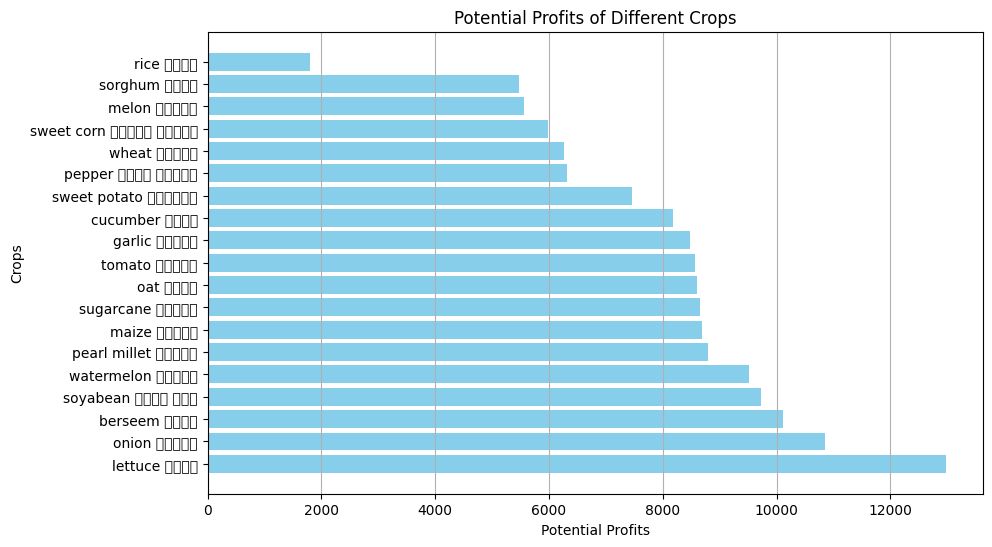

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from CSV files
df1 = pd.read_csv('combined_costs.csv')
df2 = pd.read_csv('selling_price.csv')

# Calculate potential profits
result = df2['final_price'] - df1['total_cost']

# Find crop with maximum profit
max_crop = result.idxmax()
max_value = result[max_crop]

print("Crop with Maximum Profits:", df1.loc[max_crop, 'crops'])
print("Potential Profits:", max_value)

# Create a DataFrame for visualization
subtraction_df = pd.DataFrame({'crops': df1['crops'], 'Potential Profits': result})

# Sort DataFrame by 'Potential Profits' in descending order
subtraction_df = subtraction_df.sort_values(by='Potential Profits', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(subtraction_df['crops'], subtraction_df['Potential Profits'], color='skyblue')
plt.xlabel('Potential Profits')
plt.ylabel('Crops')
plt.title('Potential Profits of Different Crops')
plt.grid(axis='x')
plt.show()

# Save results to CSV
subtraction_df.to_csv('subtraction_result.csv', index=False)


In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from CSV files
df1 = pd.read_csv('total_fertilizer_per_crop.csv')
df2 = pd.read_csv('pesticide_usage.csv')
df3=  pd.read_csv('/content/filtered_crops.csv')
df4 = pd.read_csv('subtraction_result.csv')

sustainability_index= (100-df3['objective_value'])*0.2/100 + df1['total_fertilizer']*0.3/3000 + df2['total_cost']*0.5/3750

final_df = pd.DataFrame({'crops': df1['crops'], 'Sustainability Index': 1- sustainability_index})

final_df.to_csv('final_result.csv', index=False)
print(final_df)

                     crops  Sustainability Index
0                rice चावल              0.129013
1              wheat गेहूँ              0.236302
2              maize मक्का              0.202277
3        soyabean सोया बीन              0.428037
4          sugarcane गन्ना              0.272680
5                 oat ओएटी             -0.036785
6             sorghum चारा              0.223356
7       pearl millet बाजरा              0.372731
8             berseem चारा              0.186133
9         watermelon तरबूज              0.403605
10             melon तरबूज              0.464113
11     sweet potato शकरकंद              0.401567
12           cucumber खीरा              0.456133
13       pepper काली मिर्च              0.512230
14  sweet corn स्वीट कॉर्न              0.479167
15            tomato टमाटर              0.394742
16             onion प्याज              0.257013
17            garlic लहसुन              0.465062
18            lettuce सलाद              0.298255


In [17]:
!pip install pulp
from pulp import *
import pandas as pd

# Define crop data
crops = {
    "rice": {"temperature": (20, 35), "pH": (5.5, 7), "net_return": 100},
    "wheat": {"temperature": (15, 30), "pH": (6, 7.5), "net_return": 120},
    "coffee": {"temperature": (25, 35), "pH": (6, 7.5), "net_return": 200},
    "maize": {"temperature": (22, 30), "pH": (5.8, 7.2), "net_return": 150},
    "beans": {"temperature": (20, 28), "pH": (6, 7), "net_return": 180},
    "sugarcane": {"temperature": (25, 35), "pH": (5.5, 7), "net_return": 250},
    "oat": {"temperature": (15, 20), "pH": (6, 7), "net_return": 90},
    "berseem": {"temperature": (18, 25), "pH": (6, 7.5), "net_return": 110},
}

# Input temperature and pH
temperature = float(input("Enter temperature: "))
pH = float(input("Enter pH: "))

# Filter crops based on temperature and pH
suitable_crops = [crop for crop, data in crops.items() if data["temperature"][0] <= temperature <= data["temperature"][1]
                  and data["pH"][0] <= pH <= data["pH"][1]]

print("Crops suitable for the given temperature and pH:")
print(pd.Series(suitable_crops))

# Initialize optimization model
model = LpProblem("CropRotationOptimization", LpMaximize)

# Define decision variables
rotation_vars = LpVariable.dicts("Rotation", (suitable_crops, range(1, 4), range(1, 5)), 0, cat="Binary")

# Define objective function: Maximize profit
model += lpSum(rotation_vars[crop][year][season] * crops[crop]["net_return"]
               for crop in suitable_crops for year in range(1, 4) for season in range(1, 5))

# Constraint: Only one crop can be planted in each season
for year in range(1, 4):
    for season in range(1, 5):
        model += lpSum(rotation_vars[crop][year][season] for crop in suitable_crops) == 1

# Constraint: One crop cannot be planted in two consecutive seasons
for crop in suitable_crops:
    for year in range(1, 4):
        for season in range(1, 4):
            model += rotation_vars[crop][year][season] + rotation_vars[crop][year][season + 1] <= 1

# Constraint: Two crops from the same family cannot be grown consecutively
family_dict = {
    "rice": "grain",
    "wheat": "grain",
    "oat": "grain",
    "maize": "grain",
    "beans": "legume",
    "sugarcane": "cane",
    "coffee": "bean",
    "berseem": "legume"
}

for year in range(1, 4):
    for season in range(1, 4):
        for crop in suitable_crops:
            if season < 4:  # Exclude the last season of each year from this constraint
                family = family_dict[crop]
                next_crop = [c for c in suitable_crops if family_dict[c] == family]
                if len(next_crop) >= 2:
                    model += lpSum(rotation_vars[crop][year][season] + rotation_vars[next_crop[0]][year][season + 1] +
                                   rotation_vars[next_crop[1]][year][season + 1]) <= 2
                elif len(next_crop) == 1:
                    model += lpSum(rotation_vars[crop][year][season] + rotation_vars[next_crop[0]][year][season + 1]) <= 1

# Constraint: At least one leguminous plant should be grown in one year
for year in range(1, 4):
    legumes = [crop for crop in suitable_crops if family_dict[crop] == "legume"]
    model += lpSum(rotation_vars[crop][year][season] for crop in legumes for season in range(1, 5)) >= 1

# Solve the model
model.solve()

# Print the optimized rotation schedule and objective value
print("\nOptimal Rotation Schedule:")
for year in range(1, 4):
    print(f"\nYear {year}:")
    for season in range(1, 5):
        for crop in suitable_crops:
            if rotation_vars[crop][year][season].varValue == 1:
                print(f"Season {season}: {crop}")

print("\nObjective Value (Maximum Profit):", value(model.objective))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 35.4 MB/s eta 0:00:00
Enter temperature: 30
Enter pH: 7
Crops suitable for the given temperature and pH:
0         rice
1        wheat
2       coffee
3        maize
4    sugarcane
dtype: object

Optimal Rotation Schedule:

Year 1:
Season 1: sugarcane
Season 2: coffee
Season 3: sugarcane
Season 4: sugarcane

Year 2:
Season 1: sugarcane
Season 2: sugarcane
Season 3: coffee
Season 4: sugarcane

Year 3:
Season 1: sugarcane
Season 2: coffee
Season 3: sugarcane
Season 4: sugarcane

Objective Value (Maximum Profit): 2850.0
